In [4]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6e1133f88a6976b8828dae014042318dbce4a9b428524d55c56fdde2f7f781f4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
import tensorflow as tf
import wget
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
import pickle
import numpy as np
from google.colab import drive

In [6]:
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/finaltest

/content/drive/MyDrive/finaltest


# nạp và chuyển hóa bộ dữ liệu Dataset GTSRB

In [8]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"



wget.download(link)

data = "./"

!unzip -q traffic-signs-data.zip -d $data

In [9]:
data = "./"

# Xây dựng đường dẫn, thuận tiện cho việc tái sử dụng

In [10]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

# Dùng thư viện Pickle mạnh cho làm việc với dữ liệu đã được tiền xử lý


---


*   Mở và tải nội dung tệp "train.p" thành biến "train" cho việc tái sử dụng sau này
*   Dùng mode="rb" để chuyển dạng ảnh "thô" sang dạng "byte (số nguyên)" cho máy học
*   dùng lệnh "train" để xem việc nạp dữ liệu thành công

In [11]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [12]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

# Đặt tên biến cho từng file phân chia ra thành:


*   ảnh biển báo giao thông (biến đặc trưng "features")
*   tên biển báo giao thông (biến nhãn "label")



In [13]:
trainX = train["features"]
trainY = train["labels"]

validX = valid["features"]
validY = valid["labels"]

testX = test["features"]
testY = test["labels"]

# tiền xử lý dữ liệu

In [14]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [15]:
classNames = {0: 'Speed limit (20km/h)',                      # tốc dộ tối đa 20km/h
 1: 'Speed limit (30km/h)',                                   # tốc dộ tối đa 30km/h
 2: 'Speed limit (50km/h)',                                   # tốc dộ tối đa 50km/h
 3: 'Speed limit (60km/h)',                                   # tốc dộ tối đa 60km/h
 4: 'Speed limit (70km/h)',                                   # tốc dộ tối đa 70km/h
 5: 'Speed limit (80km/h)',                                   # tốc dộ tối đa 80km/h
 6: 'End of speed limit (80km/h)',                            # tốc độ tối thiểu 80km/h
 7: 'Speed limit (100km/h)',                                  # tốc dộ tối đa 100km/h
 8: 'Speed limit (120km/h)',                                  # tốc dộ tối đa 120km/h
 9: 'No passing',                                             # cấm vượt
 10: 'No passing for vehicles over 3.5 metric tons',          # cấm xe tải
 11: 'Right-of-way at the next intersection',                 # đường ưu tiên tại ngã tư
 12: 'Priority road',                                         # đường ưu tiên
 13: 'Yield',                                                 # đường không ưu tiên
 14: 'Stop',                                                  # dừng
 15: 'No vehicles',                                           # cấm phương tiện giao thông
 16: 'Vehicles over 3.5 metric tons prohibited',              # cấm xe hơi
 17: 'No entry',                                              # cấm đi thẳng
 18: 'General caution',                                       # cảnh báo chung
 19: 'Dangerous curve to the left',                           # chỗ ngoặt nguy hiểm bên trái
 20: 'Dangerous curve to the right',                          # chỗ ngoặt nguy hiểm bên phải
 21: 'Double curve',                                          # đường công kép
 22: 'Bumpy road',                                            # đường gập ghềnh
 23: 'Slippery road',                                         # đường trơn trượt
 24: 'Road narrows on the right',                             # đường hẹp dần bên phải
 25: 'Road work',                                             # đường bộ
 26: 'Traffic signals',                                       # tính hiệu giao thông
 27: 'Pedestrians',                                           # dành cho người đi bộ
 28: 'Children crossing',                                     # có trẻ em qua đường
 29: 'Bicycles crossing',                                     # có xe đạp qua đường
 30: 'Beware of ice/snow',                                    # cẩn thận băng/ tuyết
 31: 'Wild animals crossing',                                 # đường cho động vật hoang dã
 32: 'End of all speed and passing limits',                   # đường không giới hạn
 33: 'Turn right ahead',                                      # rẽ phải phía trước
 34: 'Turn left ahead',                                       # rẽ trái phía trước
 35: 'Ahead only',                                            # chỉ được đi thẳng
 36: 'Go straight or right',                                  # chỉ được đi thẳng hoặc rẽ phải
 37: 'Go straight or left',                                   # chỉ được đi thẳng hoặc rẽ phải
 38: 'Keep right',                                            # rẽ phải
 39: 'Keep left',                                             # rẽ trái
 40: 'Roundabout mandatory',                                  # đi vào vòng xuyến
 41: 'End of no passing',                                     # dừng vuọt
 42: 'End of no passing by vehicles over 3.5 metric tons'}    # cấm xe tải vượt


Nhập số thứ tự ảnh trong tập kiểm tra: 0


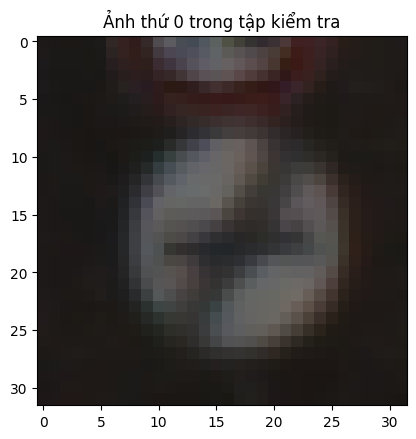

Số nhãn: 41
Tên nhãn: End of no passing


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# nhập ảnh muốn kiểm tra trong tệp trainset
image_index = int(input("Nhập số thứ tự ảnh trong tập kiểm tra: "))
selected_image = trainX[image_index]

# lấy nhãn từ ảnh
true_label = trainY[image_index]
# lấy tên nhãn từ mã nhãn
label_name = classNames[true_label]

# tạo nơi nhập thứ tự của ảnh
plt.imshow(selected_image)
plt.title(f"Ảnh thứ {image_index} trong tập kiểm tra")
plt.show()

# xuất ra màn hình
print(f"Số nhãn: {true_label}")
print(f"Tên nhãn: {label_name}")

# Dùng hàm shuffle từ module sklearn.untils


---



*   phép trộn ngẫu nhiên dữ liệu có trong tập dữ liệu
*   tránh tình trạng các mẫu sắp xếp theo quy luật dẫn đến máy học "học" thuộc đặc trưng thay vì "học" tính tổng quát đặc trưng



In [17]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

Nhập số thứ tự ảnh trong tập kiểm tra: 0


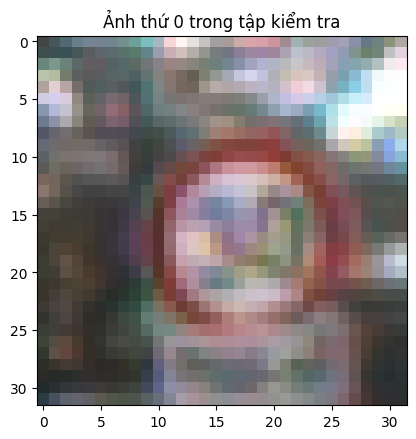

Số nhãn: 1
Tên nhãn: Speed limit (30km/h)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# nhập ảnh muốn kiểm tra trong tệp trainset
image_index = int(input("Nhập số thứ tự ảnh trong tập kiểm tra: "))
selected_image = trainX[image_index]

# lấy nhãn từ ảnh
true_label = trainY[image_index]
# lấy tên nhãn từ mã nhãn
label_name = classNames[true_label]

# tạo nơi nhập thứ tự của ảnh
plt.imshow(selected_image)
plt.title(f"Ảnh thứ {image_index} trong tập kiểm tra")
plt.show()

# xuất ra màn hình
print(f"Số nhãn: {true_label}")
print(f"Tên nhãn: {label_name}")

# Chuyển hóa "nhị phân"


\










In [19]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [20]:
trainX[0]

array([[[0.2627451 , 0.2745098 , 0.27058824],
        [0.27843137, 0.33333333, 0.36078431],
        [0.31372549, 0.41176471, 0.45098039],
        ...,
        [0.42352941, 0.51764706, 0.49019608],
        [0.54901961, 0.57254902, 0.47843137],
        [0.69019608, 0.65098039, 0.63529412]],

       [[0.24705882, 0.31372549, 0.30588235],
        [0.23529412, 0.31372549, 0.32941176],
        [0.21960784, 0.31764706, 0.33333333],
        ...,
        [0.45098039, 0.5254902 , 0.48627451],
        [0.74901961, 0.75294118, 0.75686275],
        [0.88235294, 0.81960784, 0.88235294]],

       [[0.40784314, 0.52941176, 0.47843137],
        [0.48627451, 0.59215686, 0.54509804],
        [0.41176471, 0.51372549, 0.48627451],
        ...,
        [0.70196078, 0.75686275, 0.75686275],
        [0.9372549 , 0.92156863, 0.9254902 ],
        [0.99215686, 0.90588235, 0.94117647]],

       ...,

       [[0.16470588, 0.16862745, 0.15294118],
        [0.15686275, 0.16470588, 0.15294118],
        [0.15686275, 0

In [21]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

# nạp mô hình và xử lý dữ liệu

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=0.18,              # thay đổi góc xoay
    zoom_range=0.15,                  # phóng to thu nhỏ
    width_shift_range=0.2,            # thay đổi vị trí theo chiều ngang
    height_shift_range=0.2,           # thay đổi vị trí theo chiều dọc
    shear_range=0.15,                 # thay đổi góc xiên trong ảnh
    horizontal_flip=True,             # lật ngang hình ảnh
    fill_mode="nearest"               # điền giá trị màu vào vùng trống
)

In [25]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_cnn_model(input_shape):
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(43, activation='softmax')
  ])
  return model

input_shape = (32, 32, 3)
model = create_cnn_model(input_shape)

learning_rate = 0.01
opt = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
batch_size = 64
epochs = 100

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Xây dựng mô hình CNN đơn giản
def create_cnn_model(input_shape):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(43, activation='softmax')
  ])
  return model

# Nạp mô hình ResNet50 đã được huấn luyện trước
resnet_model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_shape=(32, 32, 3)
)

# Tạo mô hình kết hợp
def create_combined_model(input_shape):
  cnn_model = create_cnn_model(input_shape)

  # ResNet50 Model
  resnet_input = tf.keras.Input(shape=input_shape)
  resnet_output = resnet_model(resnet_input)
  resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

  # Kết hợp đầu ra của hai mô hình
  merged_output = tf.keras.layers.concatenate([cnn_model.output, resnet_output])
  merged_output = tf.keras.layers.Dense(128, activation='relu')(merged_output)
  final_output = tf.keras.layers.Dense(43, activation='softmax')(merged_output) # 43 lớp

  # Tạo mô hình cuối cùng
  combined_model = tf.keras.Model(inputs=[cnn_model.input, resnet_input], outputs=final_output)
  return combined_model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Training Model

In [27]:
# --- Lưu lịch sử huấn luyện ---
import os
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

data = "./"  # Đường dẫn đến thư mục dataset
csv_filename = "training_history1.csv"
csv_filepath = os.path.join(data, csv_filename)

csv_logger = CSVLogger(csv_filepath, separator=',', append=False)

# --- Thêm Early Stopping ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# --- Bắt đầu huấn luyện ---
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
              validation_data=(validX, validY),
              steps_per_epoch=trainX.shape[0] // batch_size,
              epochs=epochs,
              verbose=1,
              callbacks=[csv_logger, early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 69s 124ms/step - accuracy: 0.1023 - loss: 3.3449 - val_accuracy: 0.2560 - val_loss: 2.6301
Epoch 2/100
  1/543 ━━━━━━━━━━━━━━━━━━━━ 1:01 114ms/step - accuracy: 0.2500 - loss: 2.5318

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2500 - loss: 2.5318 - val_accuracy: 0.2517 - val_loss: 2.6354
Epoch 3/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 79s 123ms/step - accuracy: 0.2633 - loss: 2.5113 - val_accuracy: 0.4082 - val_loss: 1.8916
Epoch 4/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4844 - loss: 2.0641 - val_accuracy: 0.4118 - val_loss: 1.8891
Epoch 5/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 84s 129ms/step - accuracy: 0.4434 - loss: 1.7937 - val_accuracy: 0.5168 - val_loss: 1.5214
Epoch 6/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5469 - loss: 1.3493 - val_accuracy: 0.5147 - val_loss: 1.5358
Epoch 7/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 70s 128ms/step - accuracy: 0.5548 - loss: 1.3880 - val_accuracy: 0.5138 - val_loss: 1.5349
Epoch 8/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.1385 - val_accuracy: 0.5159 - val_loss: 1.5635
Epoch 9/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.6257 - loss: 1.1310 - val_accu

# Xuất ra giá trị training set sau quá trình training model

In [28]:
best_accuracy = max(H.history['accuracy'])
best_accuracy_epoch = H.history['accuracy'].index(best_accuracy) + 1
print(f"Best Training Accuracy: {best_accuracy:.4f}")

best_loss = min(H.history['loss'])
best_loss_epoch = H.history['loss'].index(best_loss) + 1
print(f"Best Training Loss: {best_loss:.4f}")

Best Training Accuracy: 0.9688
Best Training Loss: 0.1863


# Lưu trữ training model

In [29]:
model.save("epoch100final.h5")

In [30]:
import os
saved_model = tf.keras.models.load_model("epoch100final.h5")

# Trực quan hóa dữ liệu độ chính xác (Accuracy) và độ mất mát (Loss)

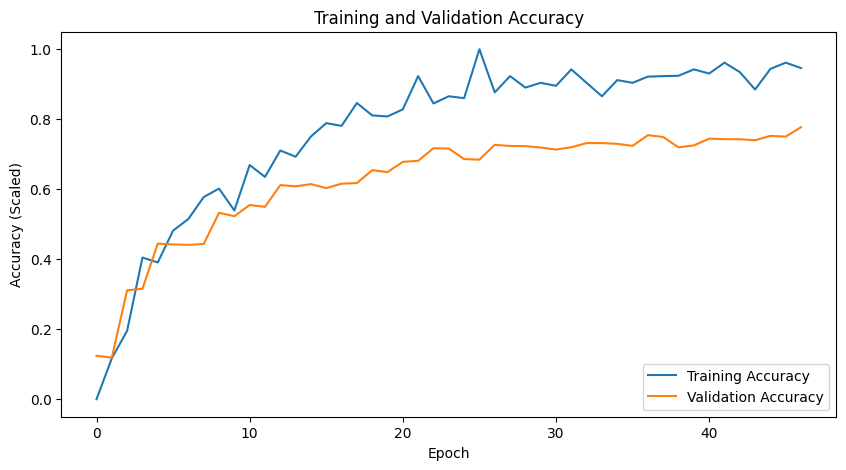

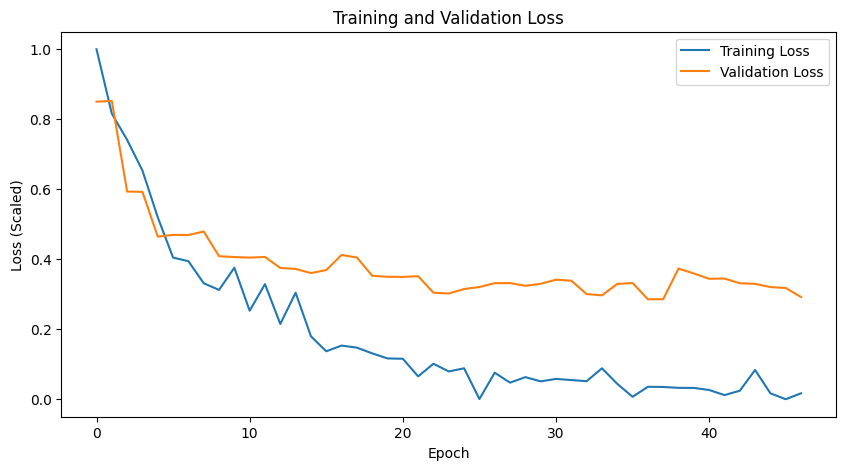

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- Scale accuracy values ---
accuracy_scaler = MinMaxScaler()
accuracy_values = np.concatenate([H.history['accuracy'], H.history['val_accuracy']]).reshape(-1, 1)  # Combine and reshape
scaled_accuracy = accuracy_scaler.fit_transform(accuracy_values)

# --- Scale loss values ---
loss_scaler = MinMaxScaler()
loss_values = np.concatenate([H.history['loss'], H.history['val_loss']]).reshape(-1, 1)  # Combine and reshape
scaled_loss = loss_scaler.fit_transform(loss_values)

# --- 1. Training and Validation Accuracy ---
plt.figure(figsize=(10, 5))
plt.plot(scaled_accuracy[:len(H.history['accuracy'])], label='Training Accuracy')
plt.plot(scaled_accuracy[len(H.history['accuracy']):], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (Scaled)')
plt.legend(loc='lower right')
plt.show()

# --- 2. Training and Validation Loss ---
plt.figure(figsize=(10, 5))
plt.plot(scaled_loss[:len(H.history['loss'])], label='Training Loss')
plt.plot(scaled_loss[len(H.history['loss']):], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend(loc='upper right')
plt.show()

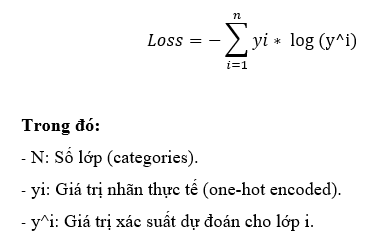



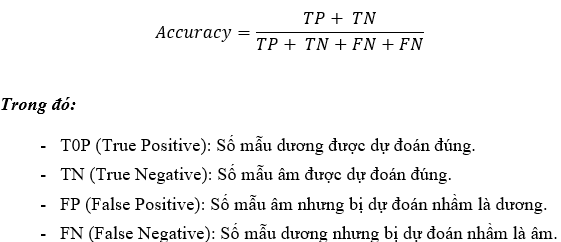

# Chạy đánh giá dự đoán của mô hình bằng Test set

Nhập số thứ tự ảnh trong tập kiểm tra: 0


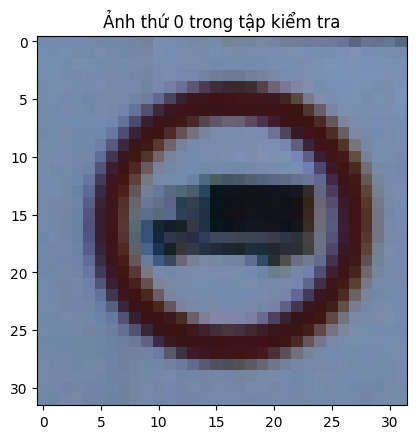

Số nhãn: 16
Tên nhãn: Vehicles over 3.5 metric tons prohibited


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Get image index from user input
image_index = int(input("Nhập số thứ tự ảnh trong tập kiểm tra: "))

# Select image from the test set
selected_image = testX[image_index]

# Get the true label of the selected image
true_label = testY[image_index]

# Get label name from classNames dictionary
label_name = classNames[true_label]

# Display the selected image
plt.imshow(selected_image)
plt.title(f"Ảnh thứ {image_index} trong tập kiểm tra")
plt.show()

# Print label information
print(f"Số nhãn: {true_label}")
print(f"Tên nhãn: {label_name}")

# Trực quan hóa số ảnh trong tệp Test set

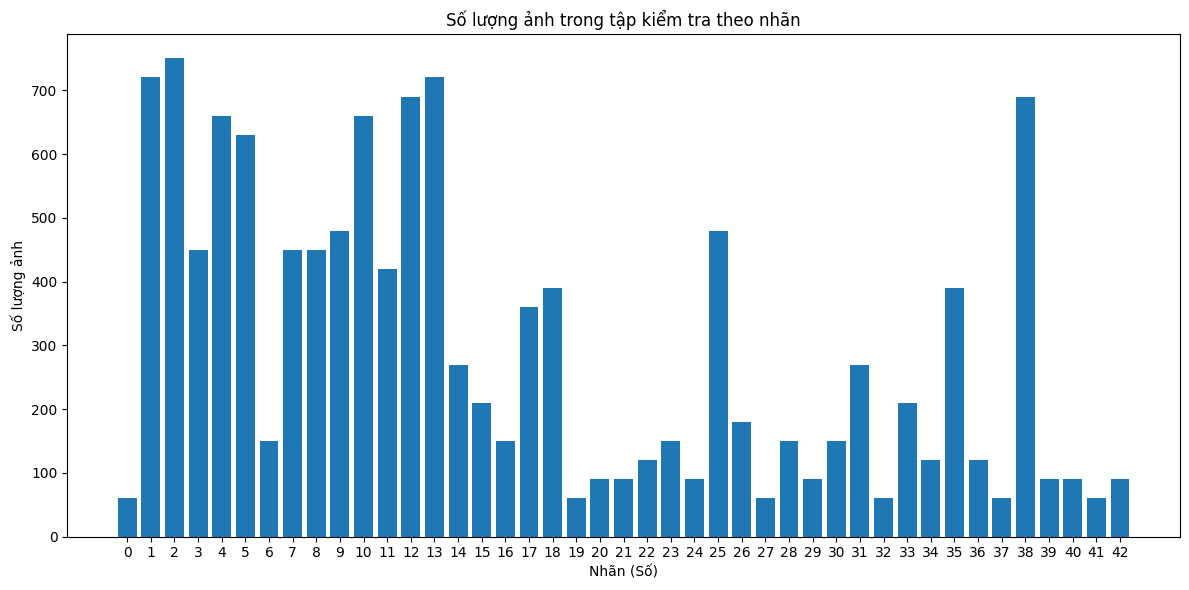

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# lấy tổng số ảnh trong testX
total_images = len(testX)
labels = list(range(0, 43))
image_counts = [0] * 43

# Đưa vào biểu đồ và nhãn tương ứng cho từng ảnh
for label in testY:
    image_counts[label] += 1

# tạo biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(labels, image_counts)
plt.xlabel("Nhãn (Số)")
plt.ylabel("Số lượng ảnh")
plt.title("Số lượng ảnh trong tập kiểm tra theo nhãn")
plt.xticks(labels)
plt.tight_layout()
plt.show()

# đánh giá mô hình bằng Confusion Matrix


395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


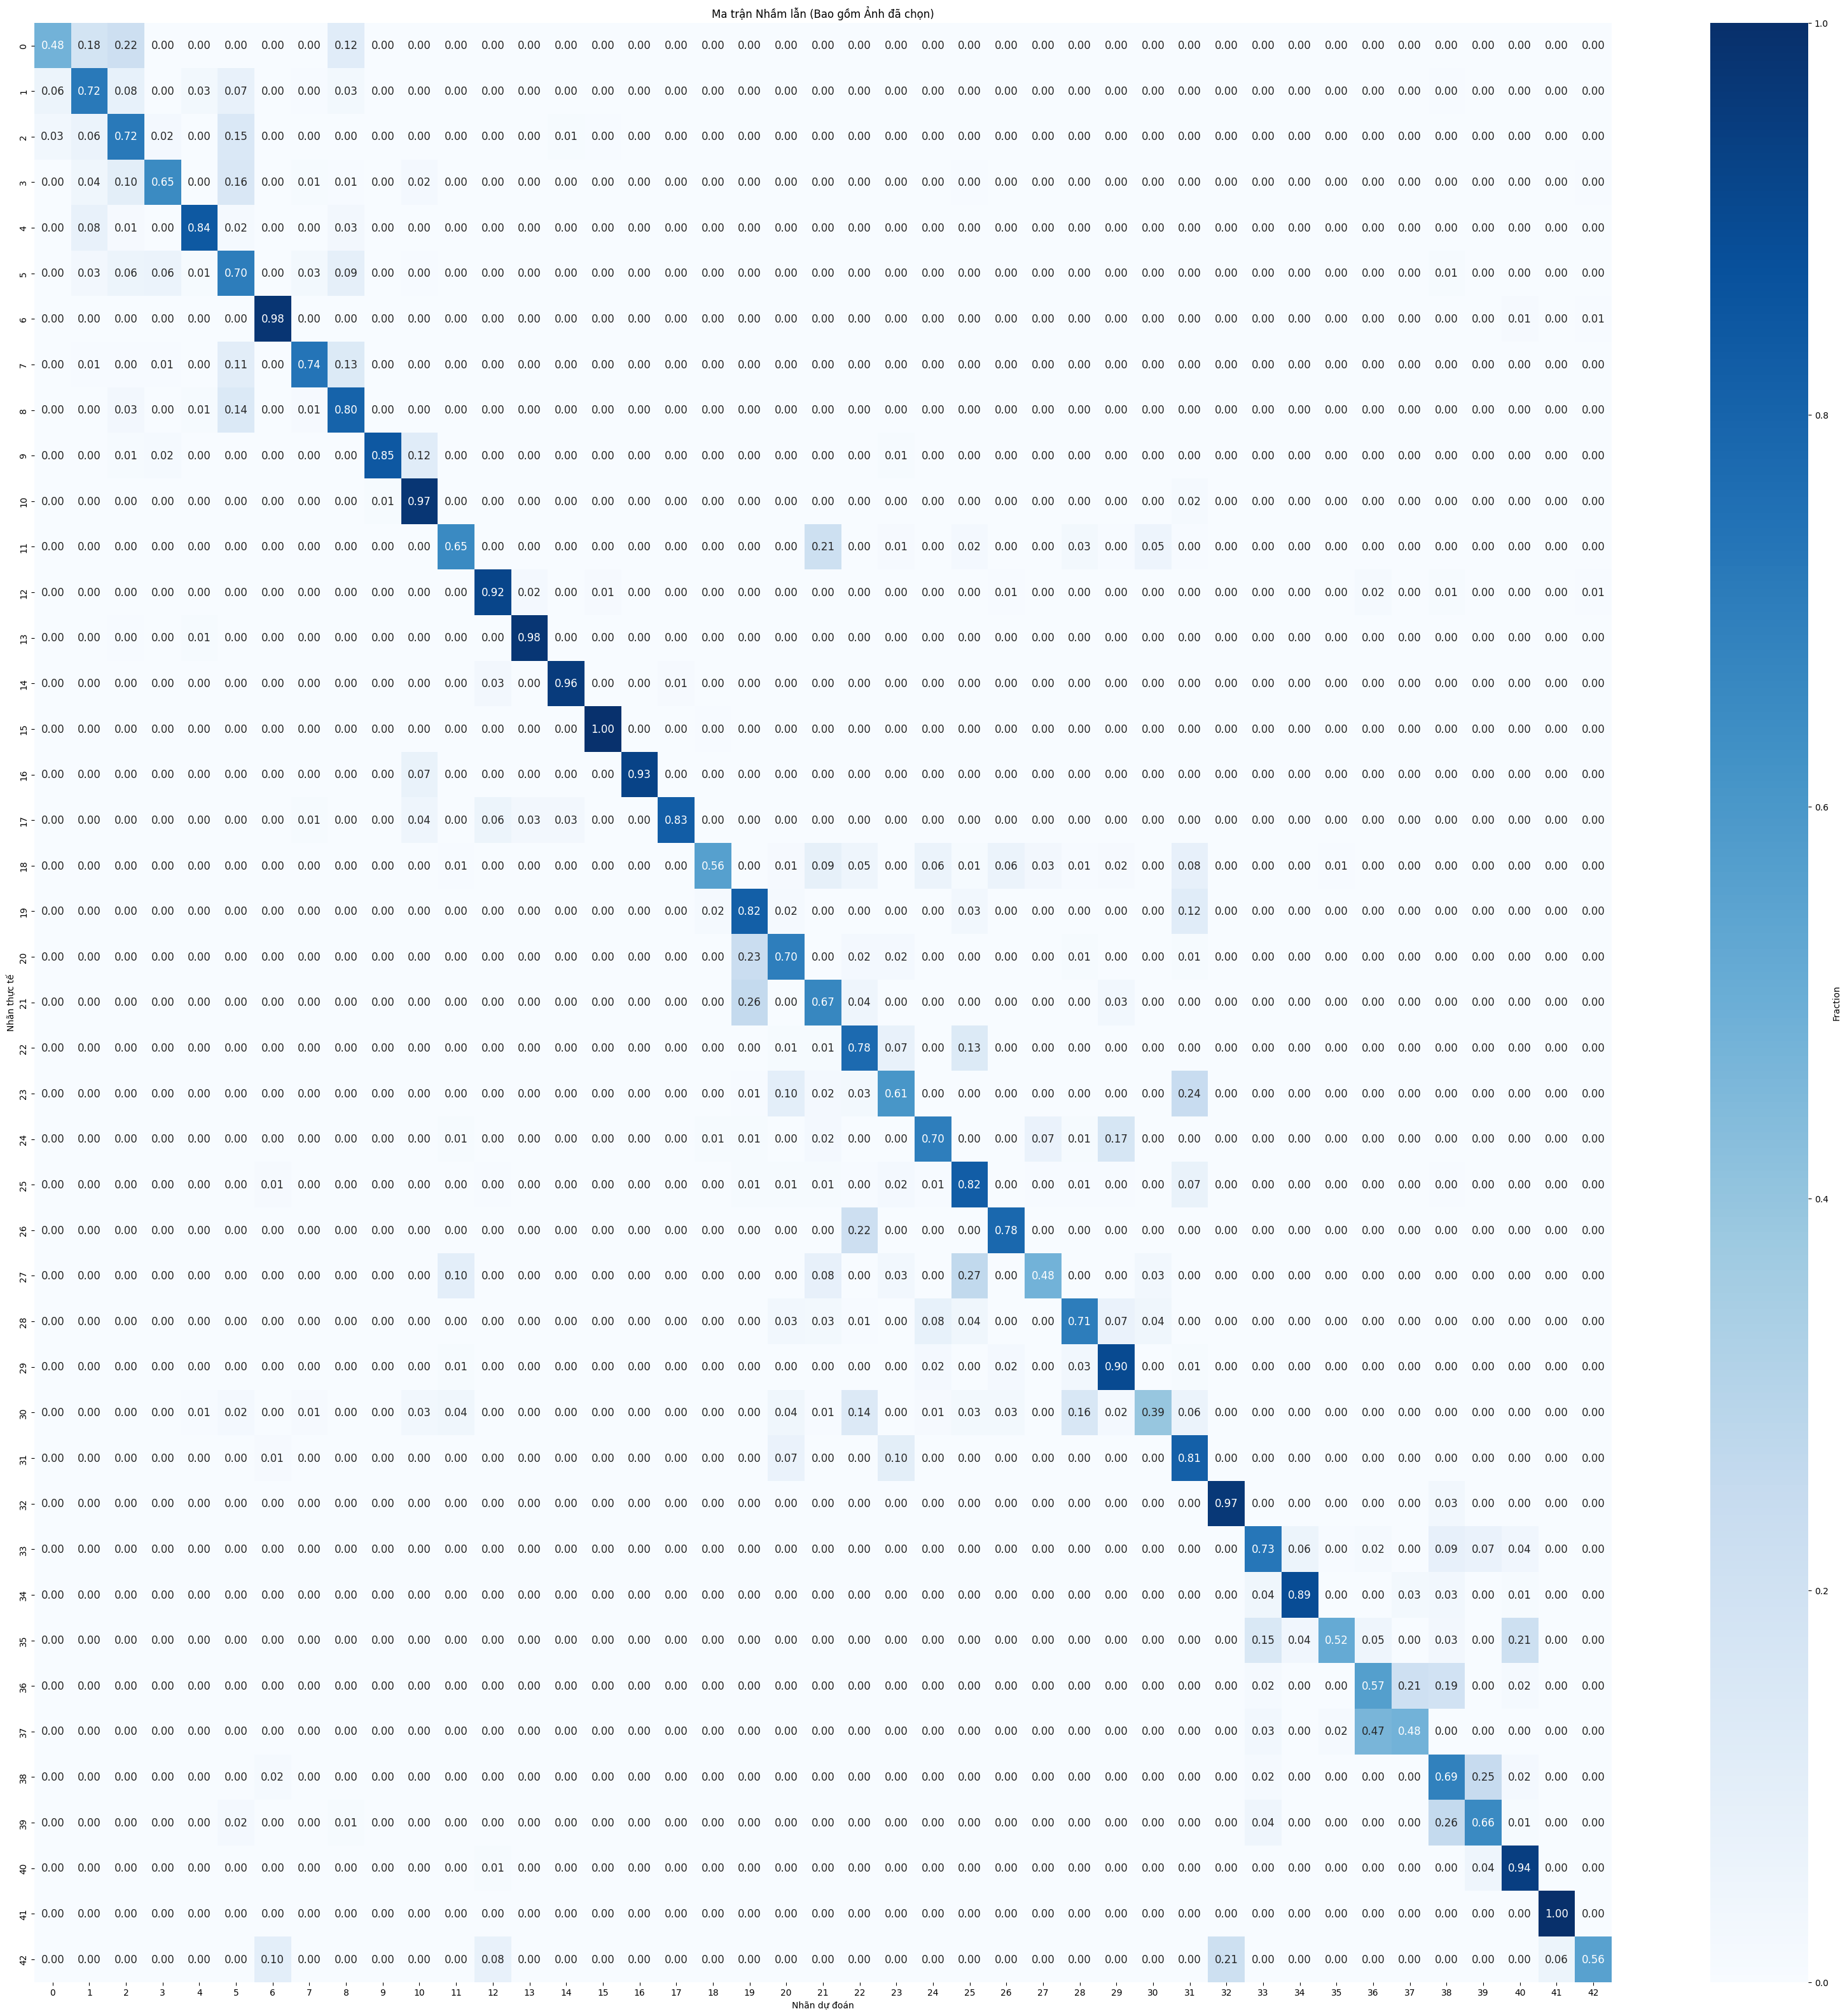

In [35]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


model_path = os.path.join("/content/drive/MyDrive/finaltest", "epoch100final.h5")
saved_model = tf.keras.models.load_model(model_path)
predictions = saved_model.predict(testX)

# --- Lấy dự đoán cho tập kiểm tra ---
predictions = saved_model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)

# --- Tính toán Ma trận Nhầm lẫn ---
cm = confusion_matrix(testY, predicted_labels)
cm_frac = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
predicted_label = predicted_labels[image_index]


# --- Trực quan hóa Ma trận Nhầm lẫn ---
plt.figure(figsize=(40, 40))
ax = sns.heatmap(cm_frac, annot=True, fmt=".2f", cmap="Blues",
                 annot_kws={"size": 12},
                 cbar_kws={'label': 'Fraction'})

plt.title("Ma trận Nhầm lẫn (Bao gồm Ảnh đã chọn)")
plt.ylabel("Nhãn thực tế")
plt.xlabel("Nhãn dự đoán")
plt.show()

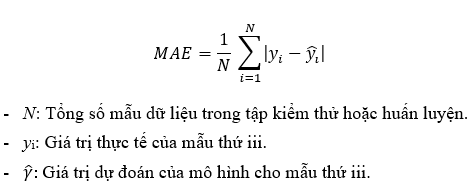